In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [2]:
d=pd.read_csv("C:/Users/Sri Dhana Lakshmi/OneDrive/Desktop/train.csv")
df=pd.DataFrame(d)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Now performing EDA
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

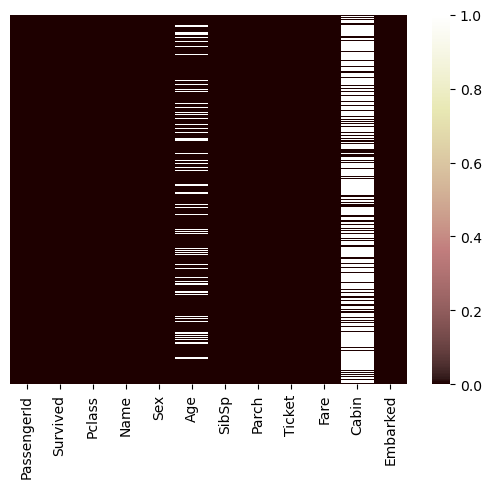

In [6]:
# To see this missing data we can use seaborn to create simple heat mapbard

sns.heatmap(df.isnull(),yticklabels=False,cmap='pink')

In [7]:
# Check the number of null values in the Embarked column
null_values = df["Embarked"].isnull().sum()


In [8]:
# Print the number of null values
print(null_values)

2


In [9]:
#imputing them with value s which is most frequent in data set

df["Embarked"].fillna("S", inplace=True)
df["Embarked"] = df["Embarked"].astype("category")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
null_values = df["Embarked"].isnull().sum()

In [11]:
# Now no null values in embarked
print(null_values)

0


In [12]:
target_cols = ["Pclass", "Survived"]

In [13]:
 # Checking the number of null values in the target columns
null_values = df[target_cols].isnull().sum()


In [14]:
# Print the number of null values
print(null_values)

Pclass      0
Survived    0
dtype: int64


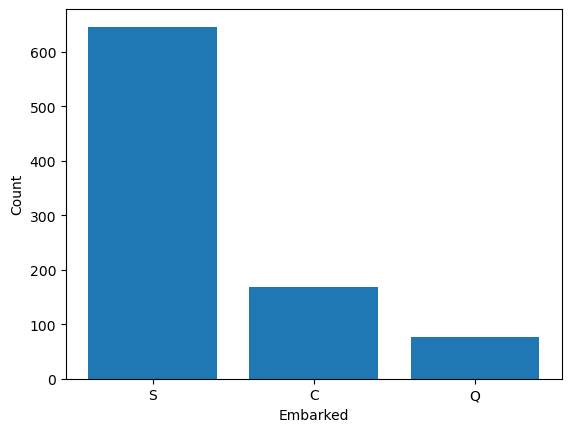

In [15]:
#Knowing relation between Embarked and survived

import matplotlib.pyplot as plt

# Create a bar chart showing the distribution of Embarked for each value of Survived

plt.bar(df["Embarked"].value_counts().index, df["Embarked"].value_counts())
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()

In [16]:
# Create a pivot table showing the survival rate for each value of Embarked

pivot_table = df.pivot_table(values="Survived", index="Embarked", aggfunc=sum)
pivot_table["Survival rate"] = pivot_table["Survived"] / df["Survived"].sum()

# Print the pivot table and this will give a more detailed view of the relationship between Embarked and Survived.
print(pivot_table)

          Survived  Survival rate
Embarked                         
C               93       0.271930
Q               30       0.087719
S              219       0.640351


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [18]:
#his code will encode the Embarked column as a numerical column. The values in the Embarked column will now be integers.

encoder = LabelEncoder()


In [19]:
df["Embarked"] = encoder.fit_transform(df["Embarked"])
                                             

In [20]:
print(df["Embarked"])

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32


In [21]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

#The train set will contain 80% of the data, and the test set will contain 20% of the data.
#The random_state parameter is used to ensure that the data is split randomly.

In [22]:
# Print the number of rows in the train and test sets
print(len(train_df))
print(len(test_df))

712
179


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [24]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [25]:
# Select the Embarked and target columns
X_train = train_df[["Embarked", "Survived"]]
y_train = train_df["Survived"]


In [26]:
# Creating an SVM classifier
clf = SVC()

In [27]:
# Training the SVM classifier
#clf.fit() method takes two arguments: the training data and the target values.
clf.fit(X_train, y_train)


SVC()

In [28]:
# Evaluate the SVM classifier on the test set
y_test = test_df["Survived"]
y_pred = clf.predict(test_df[["Embarked", "Survived"]])

#clf.predict() method takes one argument: the new data that you want to make predictions on. 
#The method will return the predicted values for the new data.

In [29]:
# Print the accuracy of the SVM classifier
# accuracy of the classifier is evaluated on the test set using the clf.score() method.

print(clf.score(test_df[["Embarked", "Survived"]], y_test))

1.0


In [30]:
# NOW RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [31]:

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [32]:
# Select the Embarked and target columns
X_train = train_df[["Embarked", "Survived"]]
y_train = train_df["Survived"]

In [33]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100)


In [34]:
# Train the random forest classifier
clf.fit(X_train, y_train)

RandomForestClassifier()

In [35]:

# Evaluate the random forest classifier on the test set
y_pred = clf.predict(test_df[["Embarked", "Survived"]])

In [36]:
# Print the accuracy of the random forest classifier
print(clf.score(test_df[["Embarked", "Survived"]], y_test))

1.0
